# Übung 6

**Gruppenname:**

Gruppenname: TSRI
<ul>
    <li>Christian Rene Thelen @cortex359
    <li>Leonard Schiel @leo_paticumbum</li>
    <li>Marine Raimbault @Marine Raimbault</li>
    <li>Alexander Ivanets @sandrium</li>
</ul>

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden wir intensiv mit Dimensionsreduktion mittels Hauptkomponentenzerlegung (PCA) beschäftigen. Wir werden die PCA implementieren und damit verschiedene Datensätze untersuchen.

### 6.1 Eigengesichter (Bildkompression mittels PCA)

In den 90er Jahren haben Forscher des Olivetti Research Laboratory in Cambridge, basierend auf der PCA, eines der frühen Verfahren für Gesichtserkennung entwickelt. Das Olivetti Research Laboratory wurde wenige Jahre später von AT&T übernommen, und der [Datensatz](https://web.archive.org/web/20051104013331/http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html), auf dem die Arbeiten beruhten, wurde unter dem Namen *Olivetti Faces Dataset* weltweit bekannt.

Wir werden uns in dieser Übung mit dem Aspekt der Dimensionsreduktion mithilfe von PCA beschäftigen, und wie sie zur Datenkompression von Gesichtsbildern eingesetzt werden kann. Die PCA-Richtungen (Hauptkomponenten) eines Datensatzes von Gesichtsbildern werden auch *Eigengesichter* bzw. *Eigenfaces* genannt.

**Ihre Daten**

Die Olivetti Faces bestehen aus 400 Graustufenbildern (64x64 Pixel), die von 40 Personen stammen. Von jeder Person wurden 10 Gesichtsbilder angefertigt, wobei die Personen gebeten wurden, unterschiedliche Gesichtsausdrücke zu zeigen. Gleichzeitig wurde die Beleuchtung während der Fotoaufnahmen variiert.

* Importieren Sie den Datensatz durch das Ausführen der untenstehenden Code-Zelle.

In [116]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Import data
data, targets = fetch_olivetti_faces(return_X_y=True)

**Ihre Aufgaben**

* Bei der Implementierung der PCA in den nachfolgenden Teilaufgaben nutzen Sie bitte ausschließlich *Numpy* und keine Funktionen von sklearn.

(1) Untersuchen Sie die Daten in `data`: 

* Nennen Sie die Anzahl der Samples (Gesichter) in diesem Datensatz.
* Nennen Sie die Anzahl der Features (Merkmale, Pixel) jedes Gesichts.
* Prüfen Sie, in welchem Wertebereich die Pixelwerte variieren und nennen Sie den Wertebereich.

In [117]:
print(f'Anzahl der Samples: {len(data)}')
print(f'Anzahl der Features: {len(data[0])}')
print(f'Wertebereich: [{data.min()}, {data.max()}]')

Anzahl der Samples: 400
Anzahl der Features: 4096
Wertebereich: [0.0, 1.0]


(2) Nutzen Sie Ihre Erkenntnisse aus (1) und visualisieren Sie das Gesicht 296 (0-basierte Zählung).

* Dabei kann Ihnen [dieser Befehl](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html?highlight=reshape#numpy.ndarray.reshape) und [jener Befehl](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) hilfreich sein. Wenn Sie `cmap=gray` verwenden, dann wird das Gesicht in Graustufen dargestellt.

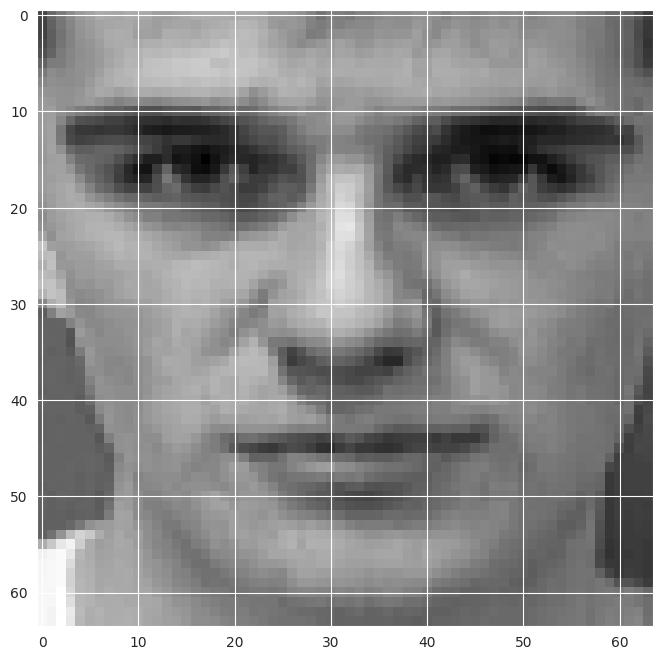

In [118]:
plt.figure(figsize=(8, 8))
plt.imshow(data[296].reshape((64, 64)), cmap='gray')
plt.show()

(3) Visualisieren Sie in einem [3x3 Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) die Gesichter 291 bis 299.

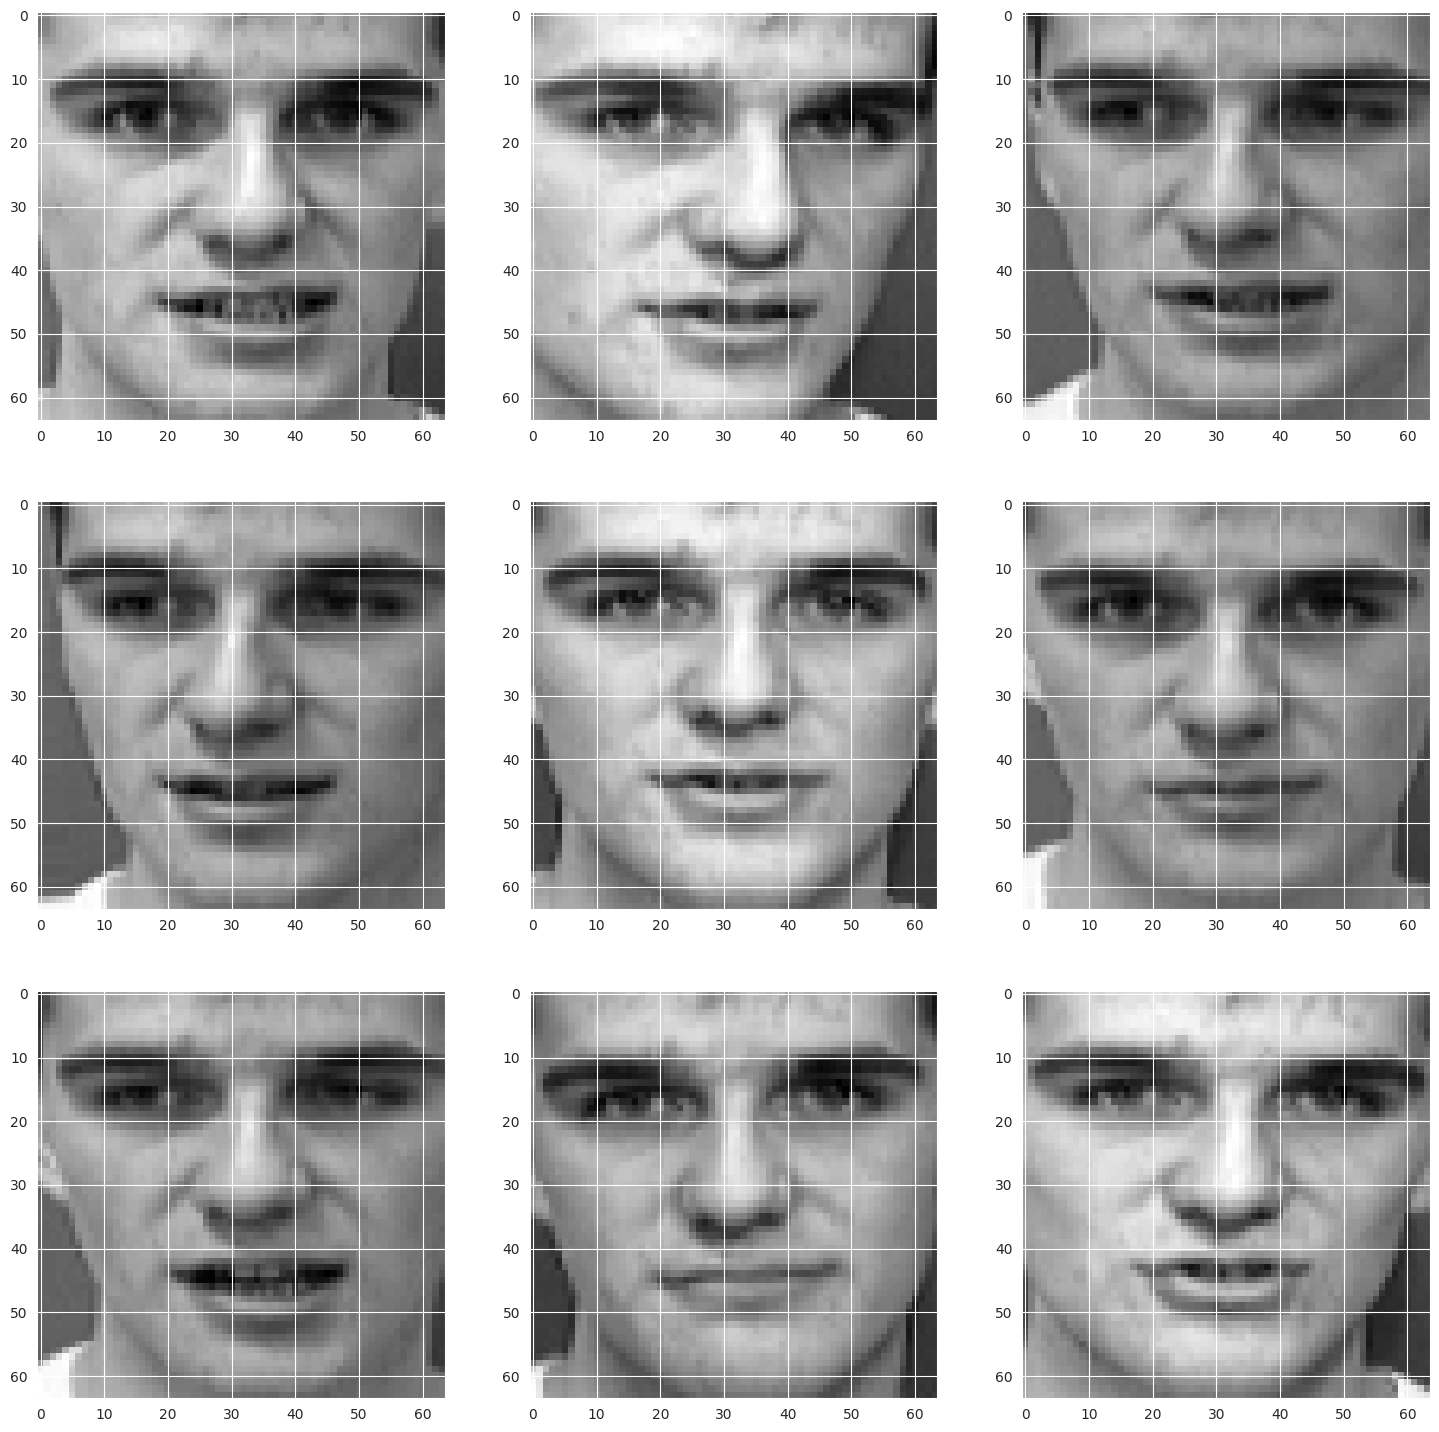

In [119]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
n = 291
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(data[n].reshape((64, 64)), cmap='gray')
        n = n + 1
plt.show()


(4) Nehmen Sie die Folien zur heutigen Vorlesung zur Hand und schlagen Sie nach, wie die PCA definiert ist.

* Überlegen Sie sich die Dimensionen der Kovarianzmatrix des Datensatzes und nennen Sie sie hier.

Die Kovarianzmatrix S soll eine $(4096, 4096)$ Dimension haben.

(5) Bestimmen Sie die [Kovarianzmatrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) `cov_mat` des Datensatzes. Überprüfen Sie, ob die Dimensionen der Kovarianz mit Ihrer Erwartung aus Schritt (4) übereinstimmt.

* Hinweis: Eine typische Fehlerquelle besteht bei diesem Schritt darin, dass die Kovarianzmatrix nicht korrekt berechnet wird. Es ist daher wichtig, dass Sie wissen und überprüfen, ob die Dimensionen der Kovarianzmatrix stimmen.

In [120]:
cov_mat = np.cov(data, rowvar=False)
print(cov_mat.shape)

(4096, 4096)


(6) [Bestimmen](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) Sie nun die Eigenwerte `eig_vals` und Eigenvektoren `eig_vecs` Ihrer Kovarianzmatrix.

In [121]:
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

(7) Ein typischer Fehler ist es, anzunehmen, dass Ihre Eigenwerte sortiert vorliegen. Dies ist im Allgemeinen *nicht* der Fall. Daher sortieren Sie bitte die Eigenwerte in absteigender Größe. Nutzen Sie dafür [diesen Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html), um die Sortierung in eine separate Variable `idx` zu speichern, mit der Sie dann die Sortierung der Eigenwerte vornehmen.

* Beachten Sie, dass der Ihnen angegebene Befehl nicht in absteigender Reihenfolge (*descending order*) sortieren kann. Sortieren Sie also zunächst aufsteigend und kehren Sie dann die Reihenfolge im resultierenden Array um. 
* Falls Sie glauben, dass Ihre Eigenwerte schon sortiert vorliegen, ohne dass Sie sortieren müssen, prüfen Sie dies nach, indem Sie sich die Variable `idx` anschauen.

In [122]:
idx = np.argsort(eig_vals)
idx = np.flip(idx)
eig_vals = np.array([eig_vals[index] for index in idx])
print(eig_vals)
print(idx)

[ 1.88401758e+01  1.10717621e+01  6.30461472e+00 ... -1.81030430e-15
 -2.13454401e-15 -2.39044326e-15]
[4095 4094 4093 ...    2    1    0]


(8) Sortieren Sie nun die assoziierten Eigenvektoren, die Sie im Array `eig_vecs` gespeichert hatten.
* Beachten Sie: Die Eigenvektoren liegen als Spalten in `eigen_vecs` vor, *nicht* als Zeilen. Dies können Sie auch in der [Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) nachschlagen. Das Verwechseln von Zeilen und Spalten ist eine typische Fehlerquelle.
* Nutzen Sie `idx`, um die Spalten (also die Eigenvektoren) so zu sortieren, dass sie zu Ihren sortierten Eigenwerten passen. Dazu können Sie [Integer Array Indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing) einsetzen. Für Integer Array Indexing müssen Sie Ihr Array `idx` [in eine Python Liste umwandeln](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html).

In [123]:
eig_vecs = eig_vecs.transpose()
eig_vecs = eig_vecs[idx]

(9) Schlagen Sie in der Vorlesung nach, wie die *Proportion of Variance Explained* (PVE) definiert ist. Bestimmen Sie die PVE als Funktion der PCA-Komponenten und visualisieren Sie sie. Visualisieren Sie ebenfalls die kumulative PVE als Funktion der PCA-Komponenten.

* Beschreiben Sie kurz den Verlauf der PVE in Ihren beiden Abbildungen. Wie interpretieren Sie diesen Verlauf? (1-2 Sätze)

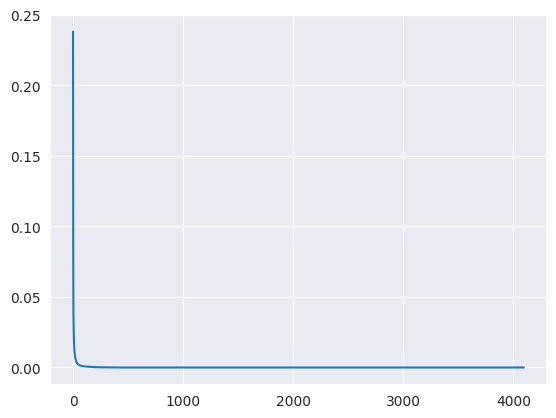

In [124]:
sum_eig_vals = np.sum(eig_vals)
pve = [eig_val / sum_eig_vals for eig_val in eig_vals]
plt.plot(pve)

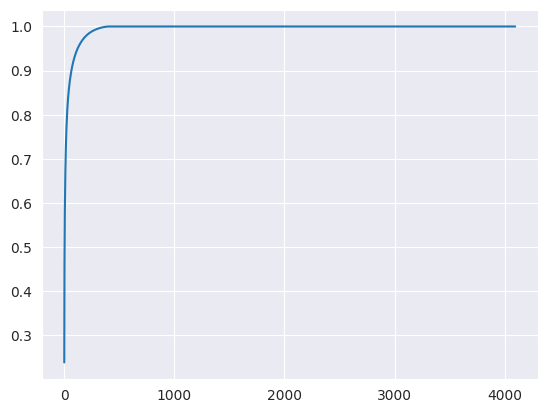

In [125]:
pve_cum_sum = np.cumsum(pve)
plt.plot(pve_cum_sum)

(10) Wir untersuchen nun die Hauptkomponenten der PCA.

* Visualisieren Sie das erste Eigengesicht (*eigenface*). Dies entspricht der 1. PCA-Komponente, also dem Eigenvektor der Kovarianzmatrix, der dem größten Eigenwert zugeordnet ist. Dieser Eigenvektor wird auch als "erster Eigenvektor" bezeichnet.

* Visualisieren Sie ebenfalls die Eigengesichter 2 bis 5.

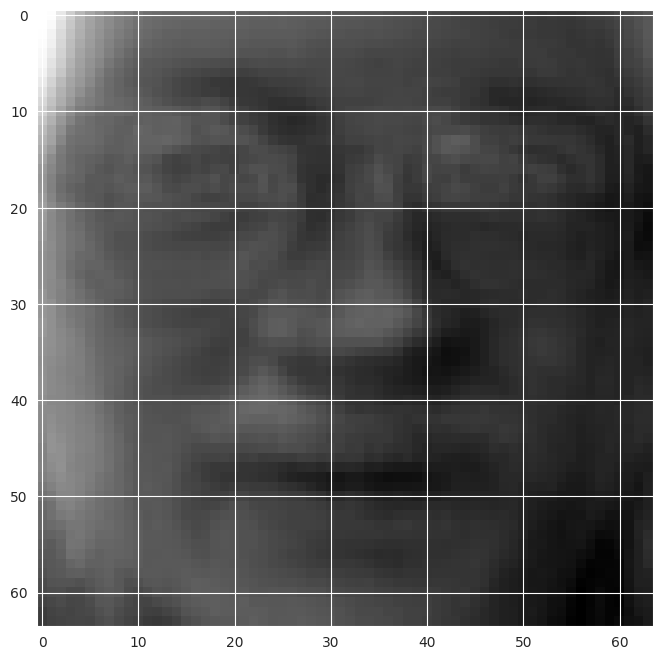

In [126]:
plt.figure(figsize=(8, 8))
plt.imshow(cov_mat[0].reshape(64, 64), cmap='gray')

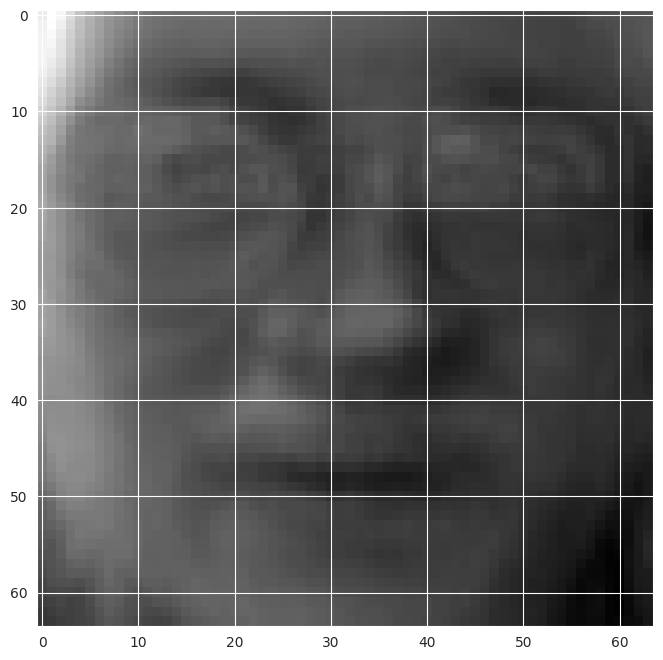

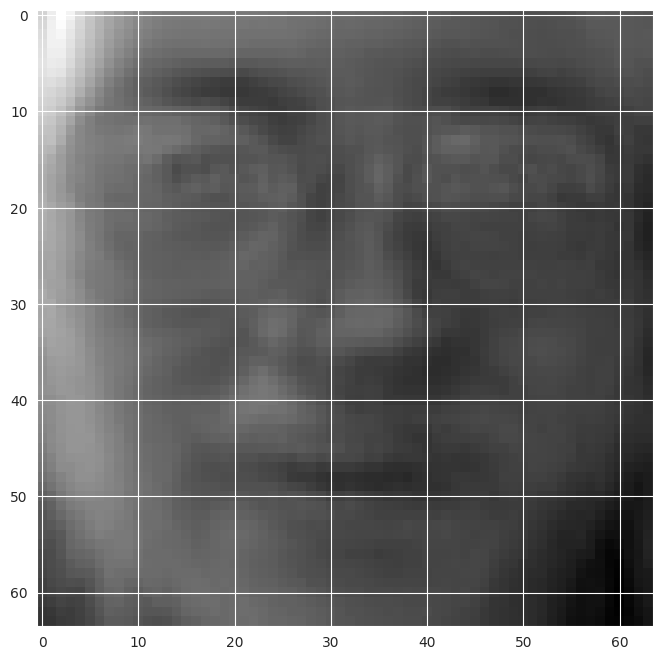

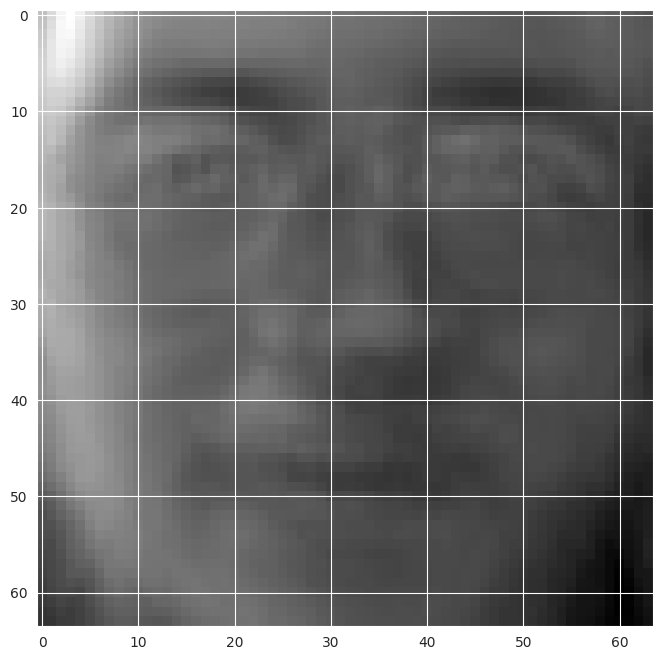

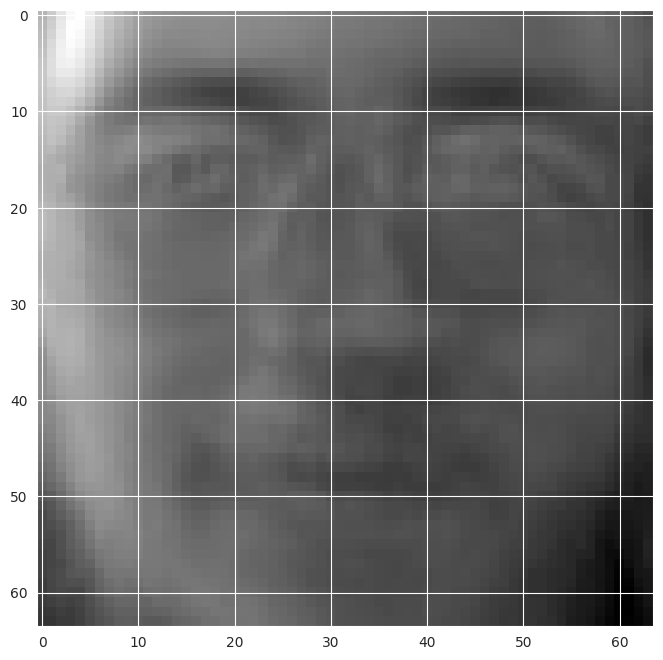

In [127]:
for i in range(1, 5):
    plt.figure(figsize=(8, 8))
    plt.imshow(cov_mat[i].reshape(64, 64), cmap='gray')
    plt.show()


(11) Seien $\vec{f}_1, \ldots, \vec{f}_k$ die PCA-Komponenten der $k$-größten Eigenwerte, und bezeichne $\vec{g}$ der Vektor, der das Gesicht 296 (0-basierte Zählung) darstellt. Projizieren Sie das Gesicht $\vec{g}$ auf die ersten 25 PCA-Komponenten (Eigengesichter). Sie erhalten dadurch 25 Koeffizienten $c_i$,

$$c_i = \vec{f}_i^\text{T}(\vec{g}-\vec{m}),$$

wobei $\vec{m}$ der Vektor der Mittelwerte über die Merkmale des gesamten Datensatzes ist. Denn: Vergessen Sie nicht, dass Sie Ihre Daten *vor* der Projektion zentrieren müssen (schlagen Sie die entsprechende Folie in der Vorlesung nach). Dies bedeutet, dass Sie von den Merkmalen (Pixeln) des Gesichts 296 jeweils die Mittelwerte (ermittelt über den ganzen Datensatz) abziehen müssen.
  
Bemerkung:

* Sie haben hier das Gesicht 296 mithilfe von 25 Koeffizienten beschrieben und damit mit einem Vektor in einem 25-dimensionalen Raum. Dieser Raum ist deutlich kleiner als der ursprüngliche Raum (Dimensionsreduktion!). 


In [128]:
face_296 = data[296]
eig_vecs_25 = eig_vecs[0:25] # First 25 components
mean_vector = np.mean(data, axis=0)

centered_face = face_296 - mean_vector

coefficients = np.dot(eig_vecs_25, centered_face)

(12) Sie haben aus Teilaufgabe (11) 25 Koffizienten vorliegen, mit denen Sie - mithilfe der Eigengesichter - nun das Gesicht rekonstruieren werden. Rekonstruieren Sie das Gesicht aus den 25 Koeffizienten mithilfe der Eigengesichter,

$$\vec{g}^\prime = \left(\sum\limits_{i=1}^k c_i \vec{f}_k\right) + \vec{m},$$

wobei Sie auch hier sich daran erinnern, dass Sie für die Rekonstruktion nun den Mittelwertsvektor $\vec{m}$, den Sie in Teilschritt (11) abgezogen hatten, wieder aufaddieren müssen.

* Visualisieren Sie in einem Plot das ursprüngliche Gesicht (links) sowie das rekonstruierte Gesicht (rechts).

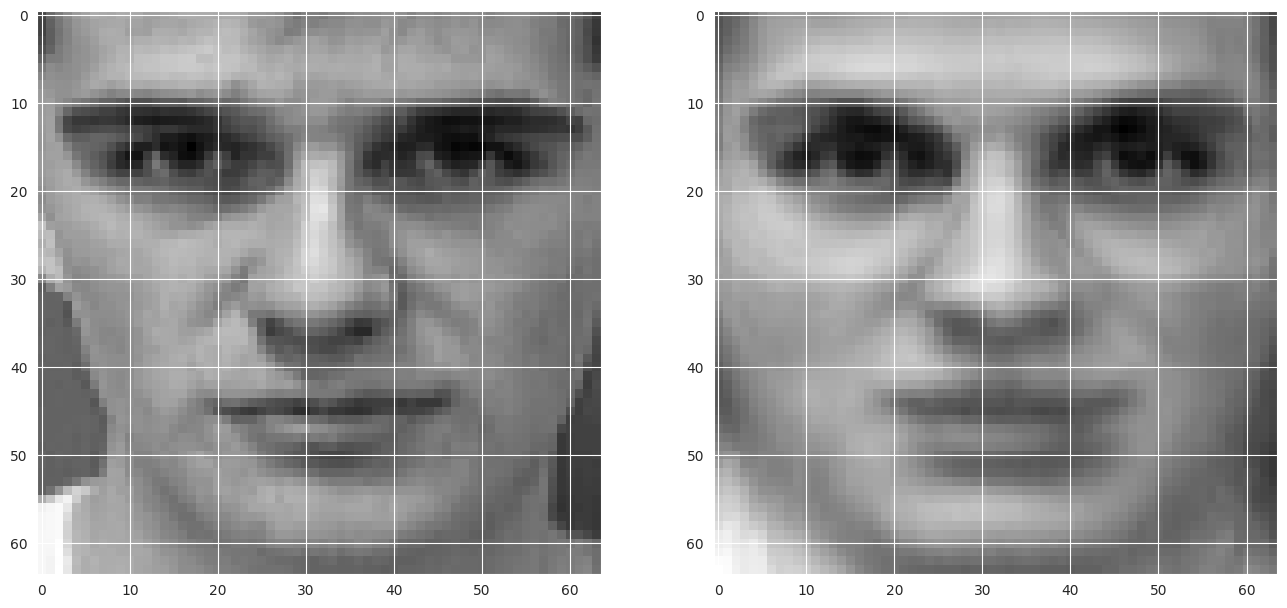

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(face_296.reshape((64, 64)), cmap='gray') # das ursprüngliche Gesicht

reconstructed_face = np.dot(coefficients, eig_vecs_25) + mean_vector
axs[1].imshow(reconstructed_face.reshape((64, 64)), cmap='gray')

(13) Experimentieren Sie mit einer größeren Anzahl von PCA-Komponenten und untersuchen Sie, wie sich die Projektion und die Rekonstruktion verbessert, wenn Sie die ersten 100 oder 200 PCA-Komponenten benutzen.

* Was beobachten Sie, wenn Sie die Anzahl der PCA-Komponenten erhöhen? (1-2 Sätze)

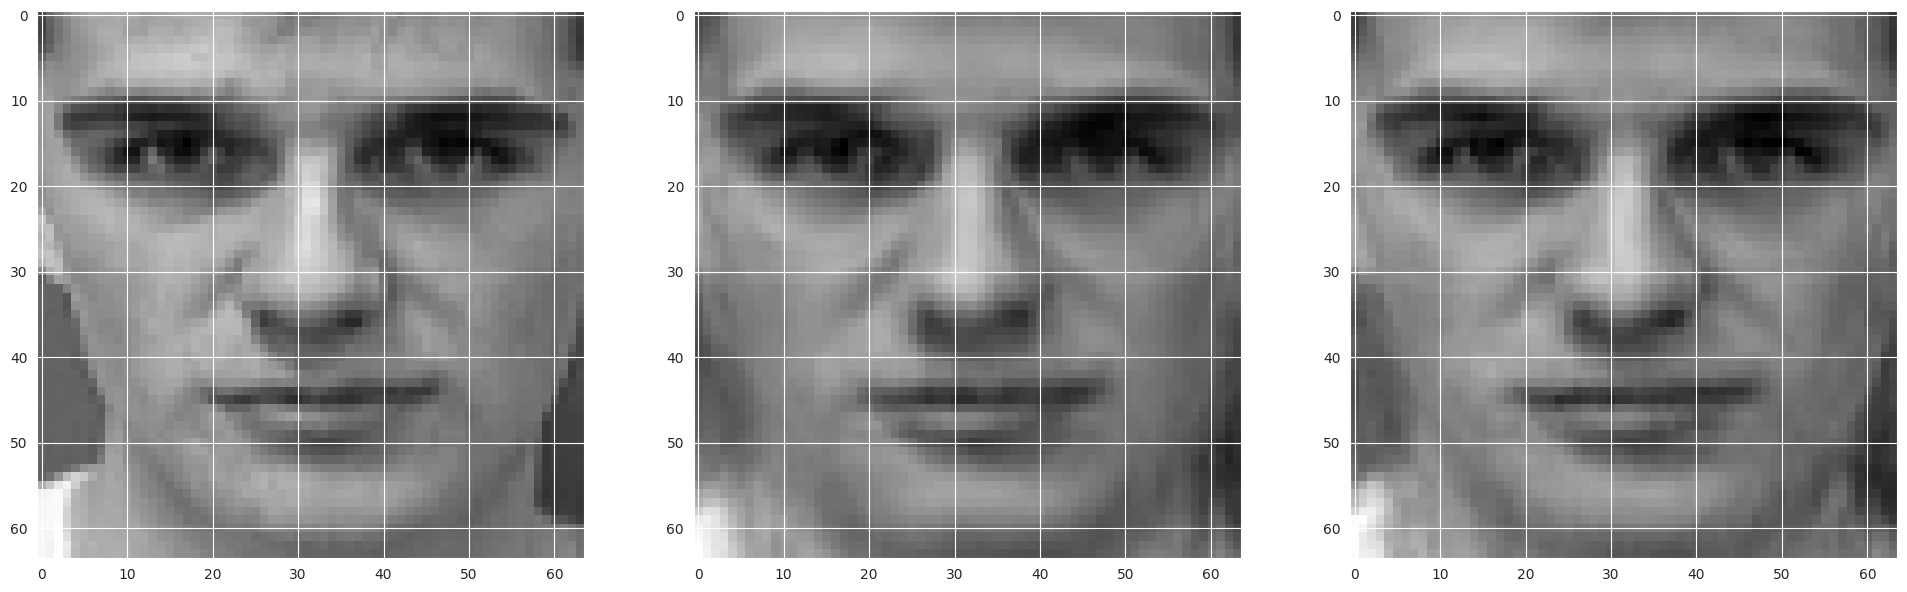

In [130]:
# 100 PCA
eig_vecs_100 = eig_vecs[0:100]
coefficients_100 = np.dot(eig_vecs_100, centered_face)
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].imshow(face_296.reshape((64, 64)), cmap='gray')

reconstructed_face_100 = np.dot(coefficients_100, eig_vecs_100) + mean_vector
axs[1].imshow(reconstructed_face_100.reshape((64, 64)), cmap='gray')

eig_vecs_200 = eig_vecs[0:200]
coefficients_200 = np.dot(eig_vecs_200, centered_face)
reconstructed_face_200 = np.dot(coefficients_200, eig_vecs_200) + mean_vector
axs[2].imshow(reconstructed_face_200.reshape((64, 64)), cmap='gray')

plt.show()

Wenn die Anzahl von PCA-Komponenten erhöht, wird die Rekonstruktion verbessert.

(14) Nehmen Sie an, wir würden PCA als Bildkompressionsmethode einsetzen. Überdenken Sie folgendes Gedankenexperiment: Wir projizieren jedes Gesicht auf die 200 größten PCA-Komponenten (Eigengesichter) und erhalten jeweils 200 Koeffizienten pro Gesicht. Wir speichern nun diese Koeffizienten sowie die 200 PCA-Komponentenvektoren in einer Datei ab.

* Wie groß (in Megabytes) ist der Originaldatensatz, wenn wir zur Speicherung jedes Pixels 8 Bytes nutzen?
* Wie groß (in Megabytes) wäre der projizierte Datensatz, der lediglich die 200 Eigengesichter, die 200 Koeffizienten pro Gesicht sowie den Mittelwertsvektor ($\vec{m}$) enthält? Wir nehmen auch in diesem Fall an, dass jedes Pixel und jeder Koeffizient 8 Bytes belegt.

Originaldatensatz: $400 * 4096 * 8 = 12.5$ Megabytes

Projizirte Datesanz:
* Größe der PCA-Komponenten: $200 * 4096 * 8 = 6553600$ Bytes
* Größe der Koeffizienten: $200 * 400 * 8 = 640000$ Bytes
* Größe des Mittelwertsvektors: $4096 * 8 = 32768$ Bytes
* Gesamtgröße: $6.8916$ Megabytes

(15) \[Optional\] Nutzen Sie [ipython Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html), um eine interaktive Visualisierung der Gesichter des Datensatzes sowie ihrer Rekonstruktion zu erstellen: Legen Sie zwei Slider an: Mit dem ersten Slider können sie die Nummer des zu visualisierenden Gesichtes im Datensatz einstellen. Mit dem zweiten Slider können Sie die Anzahl der PCA-Komponenten für die Projektion und anschließende Rekonstruktion einstellen. Das Widget soll das ursprüngliche Gesicht sowie das rekonstruierte Gesicht darstellen.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Beispielhafte Daten
num_faces = 400
num_pixels = 4096
mean_vector = np.mean(data, axis=0)
pca_components_full = eig_vecs

def project_and_reconstruct(face_index, num_components):
    centered_face = data[face_index] - mean_vector
    
    pca_components = pca_components_full[:num_components]
    
    coefficients = np.dot(pca_components, centered_face)
    
    reconstructed_face = np.dot(coefficients, pca_components) + mean_vector
    
    original_face_image = data[face_index].reshape(64, 64)
    reconstructed_face_image = reconstructed_face.reshape(64, 64)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Originales Gesicht
    axes[0].imshow(original_face_image, cmap='gray')
    axes[0].set_title("Originales Gesicht")
    axes[0].axis('off')
    
    # Rekonstruiertes Gesicht
    axes[1].imshow(reconstructed_face_image, cmap='gray')
    axes[1].set_title(f"Rekonstruiertes Gesicht\n({num_components} PCA-Komponenten)")
    axes[1].axis('off')
    
    plt.show()

# Interaktive Widgets
face_slider = widgets.IntSlider(min=0, max=num_faces-1, step=1, value=0, description='Gesicht #')
components_slider = widgets.IntSlider(min=1, max=4096, step=1, value=25, description='PCA-Komponenten')

interact(project_and_reconstruct, face_index=face_slider, num_components=components_slider)


interactive(children=(IntSlider(value=0, description='Gesicht #', max=399), IntSlider(value=25, description='P…

<function __main__.project_and_reconstruct(face_index, num_components)>

### 6.2 Kriminalitätsraten (EDA mithilfe der PCA)

In dieser Übung werden wir einen klassischen Datensatz untersuchen, der aus den USA stammt. Es handelt sich um eine Zusammenstellung der Kriminalitätsraten in verschiedenen Staaten der USA sowie um den Prozentsatz der Bevölkerung, der in urbanen Regionen lebt (*UrbanProp*) aus dem Jahr 1975. Bei den Kriminalitätsraten interessieren uns Morde (*murder*), Körperverletzungen (*assault*) sowie Vergewaltigungen (*rape*) pro 100000 Einwohner, aufgeschlüsselt nach US-Staaten. Der Datensatz stammt aus dem *World Almanac and Book of facts 1975* (Kriminalitätsraten) und den *Statistical Abstracts of the United States 1975* (Urbane Regionen).

**Ihre Daten**

* Sie finden den Datensatz, den Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/USArrests.csv).

**Ihre Aufgaben**

(1) Importieren Sie den Datensatz und verschaffen Sie sich einen Überblick darüber, welche Merkmale (Features) Ihr Datensatz aufweist.

In [132]:
import pandas as pd
usa_arrests = pd.read_csv('USArrests.csv', index_col=0)
usa_arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


(2) Führen Sie eine explorative Analyse durch (mit Mitteln der deskriptiven Statistik, Visualisierung und Werkzeugen zur Ermittlung von Zusammenhängen (Korrelationen)). Schreiben Sie (1-3 Sätze) Ihre Befunde auf.

In [133]:
print(usa_arrests.describe())

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


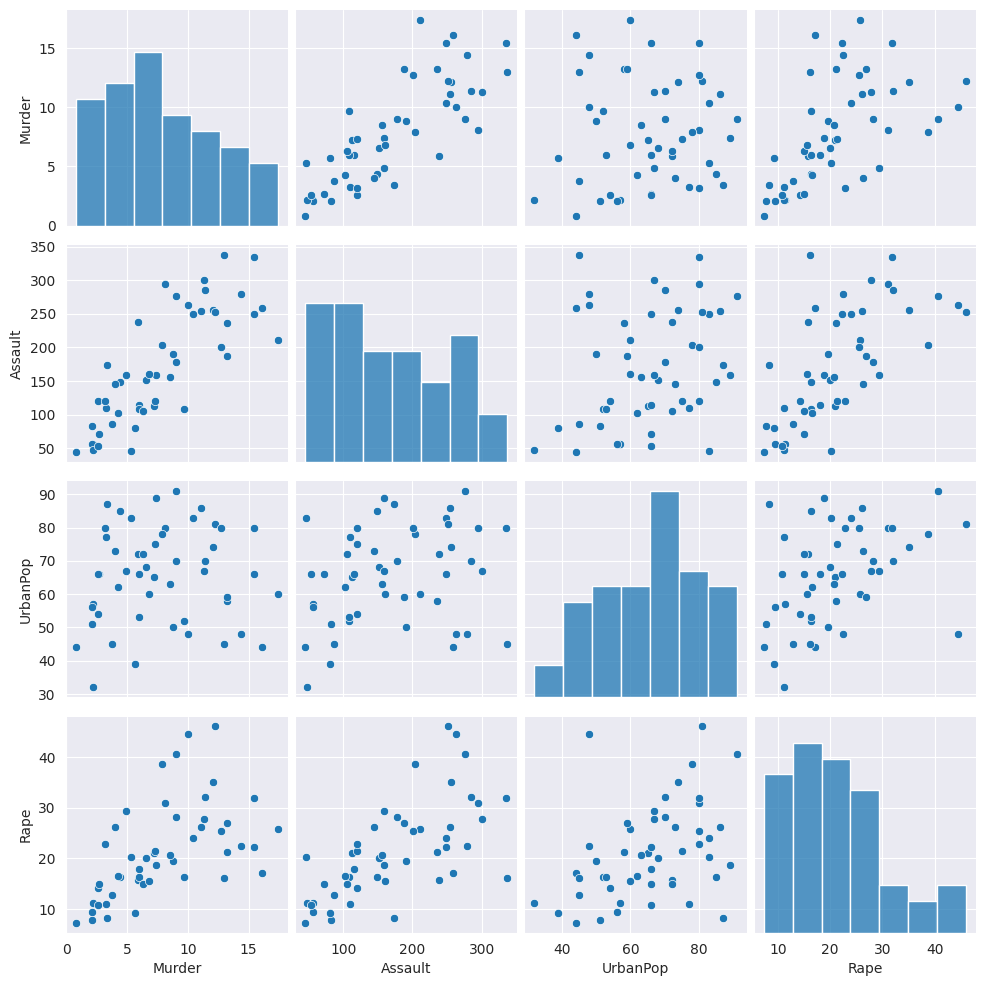

In [134]:
import seaborn as sns
sns.pairplot(data=usa_arrests)

In [135]:
usa_arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


`Murders` und `Assault` sind stark linear korreliert. `Assaults` und `Rape` sind auch linear korreliert.

(3) Ermitteln Sie die Varianz der Merkmale. Welche Unterschiede stellen Sie fest? (1-2 Sätze).

In [136]:
print(usa_arrests.describe().loc['std'])

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
Name: std, dtype: float64


`Assault` hat eine sehr höhe Varianz in Vergleich mit anderen Merkmalen.

(4) Wir bereiten uns jetzt für eine Dimensionsreduktion per PCA vor. Klären Sie für sich zunächst: In welchen Skalen wurden die Merkmale gemessen? 

Die Merkmale der Straftaten sind in Fälle pro 100k Einwohner gemessen, `UrbanProp` ist in Prozent.

(5) Welche Vorbereitungsmaßnahme ergibt sich für Sie aus Punkt (4)? Bereiten Sie Ihre Daten entsprechend vor.
* ROT-13 kodierter Tipp: Fpunhra Fvr va qvr Ibeyrfhatfhagreyntra: Jvr fbyygra Fvr Vuer Qngra ibe rvare CPN genafsbezvrera?

In [137]:
usa_arrests_z = (usa_arrests - usa_arrests.mean()) / usa_arrests.std() # Z-Transformation

(6) Nutzen Sie Ihre Implementierung der PCA aus Aufgabe 6.1 und führen Sie die PCA durch. Ihr Produkt sind die Merkmale in den neuen PCA-Koordinaten.

In [138]:
eig_vals, eig_vecs = np.linalg.eigh(np.cov(usa_arrests_z, rowvar=False))
idx = np.flip(np.argsort(eig_vals))
eig_vals = np.array([eig_vals[index] for index in idx])
eig_vecs.transpose()
eig_vecs = eig_vecs[idx]

print(f'Eigenvalues: {eig_vals}')
print(f'Eigenvectors: {eig_vecs}')

Eigenvalues: [2.48024158 0.98976515 0.35656318 0.17343009]
Eigenvectors: [[ 0.08902432  0.81777791 -0.16731864 -0.54343209]
 [ 0.13387773 -0.37801579 -0.87280619 -0.27819087]
 [-0.74340748 -0.26814843  0.1879856  -0.58318363]
 [ 0.6492278  -0.34123273  0.41818087 -0.53589947]]


(7) Implementieren Sie eine Funktion, die Ihnen die *Proportion of Variance Explained* (PVE) für ein gegebenes Merkmal berechnet. Schlagen Sie dazu in der Vorlesung nach, wie die PVE definiert ist.

In [139]:
sum_eig_vals = np.sum(eig_vals)
pve = [eig_val / sum_eig_vals for eig_val in eig_vals]

(8) Visualisieren Sie die PVE als Funktion der PCA-Komponente: Erstellen Sie einen Plot, der die PVE der ersten, zweiten, usw. Komponente der PCA anzeigt.

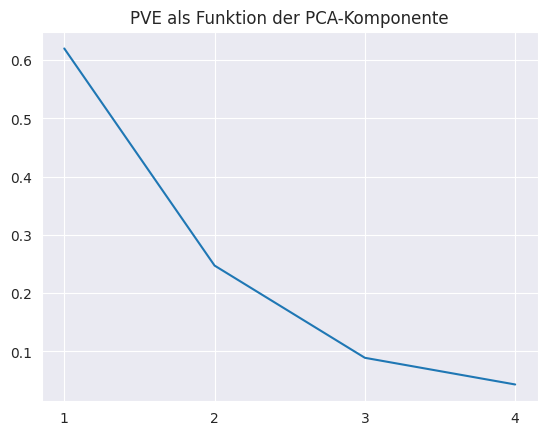

In [140]:
plt.plot(np.arange(len(idx)) + 1, pve)
plt.title("PVE als Funktion der PCA-Komponente")
plt.xticks(np.arange(len(idx)) + 1)
plt.show()

(9) Ermitteln Sie die Anzahl der ersten PCA-Komponenten, mit deren Hilfe Sie etwas mehr als 85% der Gesamtvarianz erklären können. Notieren Sie sich diese Zahl.

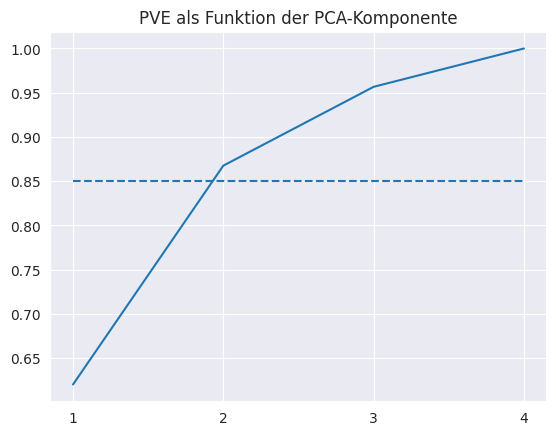

In [141]:
pve_cum_sum = np.cumsum(pve)
plt.plot(np.arange(len(idx)) + 1, pve_cum_sum)
plt.title("PVE als Funktion der PCA-Komponente")
plt.xticks(np.arange(len(idx)) + 1)
plt.hlines(y=0.85, xmin=1, xmax=4, linestyles='--')
plt.show()

(10) Für die aus Schritt (9) ermittelte Anzahl an PCA Komponenten betrachten Sie nun die assoziierten Richtungsvektoren: Listen Sie die Komponenten der Richtungsvektoren in einer Tabelle (z.B. einem DataFrame), in der jede Spalte einen Richtungsvektor enthält und die Zeilen den Richtungsvektorkomponenten entsprechen. Beschriften Sie die Zeilen mit den Namen der Merkmale Ihres Datensatzes.

In [142]:
pd.DataFrame(eig_vecs[0:2].transpose(), usa_arrests_z.columns, columns=['u1', 'u2'])

,u1,u2
Murder,0.089024,0.133878
Assault,0.817778,-0.378016
UrbanPop,-0.167319,-0.872806
Rape,-0.543432,-0.278191


(11) Betrachten Sie nun Ihre Tabelle aus Schritt 10: Die Einträge der Richtungsvektoren entsprechen dem Gewicht, dem die PCA-Transformation dem entsprechenden Merkmal bei der Projektion auf die PCA-Richtung zuweist. Interpretieren Sie die Gewichte der 1. PCA Komponente: Welche Merkmale scheinen für die 1. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

Die Gewichte der 1. PCA-Komponente zeigen, dass das Merkmal `Assault` am wichtigsten ist. `Rape` folgt mit einem negativen Gewicht, das ebenfalls bedeutend ist, jedoch in entgegengesetzter Richtung wirkt. `Murder` und `UrbanPop` haben geringere Gewichte, das bedeutet, dass sie weniger wichtig sind für die 1. PCA-Komponente im Vergleich zu `Assault` und `Rape`.

(12) Interpretieren Sie die Gewichte der 2. PCA Komponente: Welche Merkmale scheinen für die 2. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

Die Gewichte der 2. PCA-Komponente zeigen, dass das Merkmal `UrbanPop` am wichtigsten ist. Alle anderen sind weniger wichtig.


(13) In Anbetracht Ihrer Beobachtungen aus Schritten (11) und (12): Welche Eigenschaften fasst die 1. PCA Komponente zusammen, welche die 2. PCA-Komponente? Welche ungefähren Namen würden Sie den PCA-Komponenten geben?

Da die 1. PCA-Komponente hat hohe gewicht für `Assault` und `Rape`, was könnte bedeuten, dass die 1. Komponente die "Gewaltkriminnalität" zeigt. Die 2. hat höhere Gewicht für `UrbanPop`, die kann man als "Urbanisierung" nennen.

(14) Visualisieren Sie die Daten in ihren in Schritt (9) ausgewählten PCA-Komponenten in einem Scatterplot. Beschriften Sie die Achsen mit den provisorischen Namen, die Sie ihnen in Schritt 13 gegeben haben.

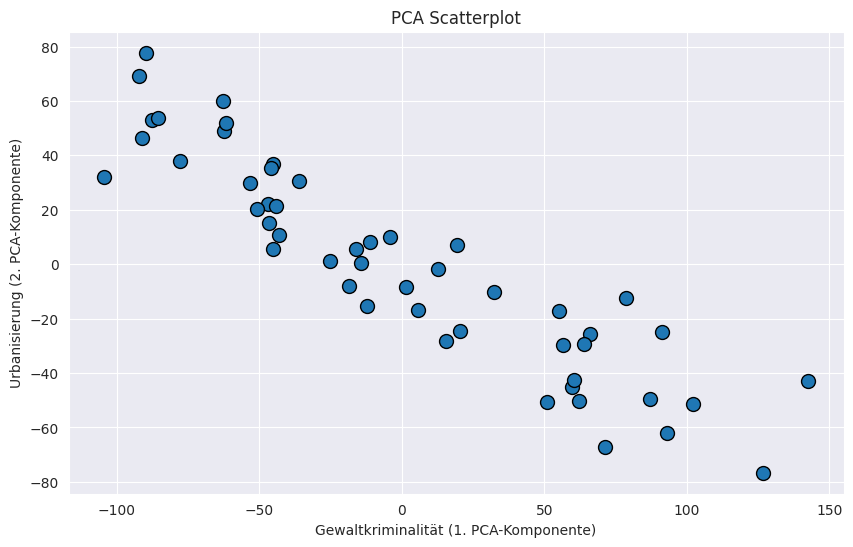

In [150]:
mean_vector = np.mean(usa_arrests, axis=0)
centered_data = usa_arrests - mean_vector

pca_components = eig_vecs[:2]

# Daten auf die Hauptkomponenten projizieren
coeffs = np.dot(centered_data, pca_components.transpose())

# Visualisierung der projizierten Daten
plt.figure(figsize=(10, 6))
plt.scatter(coeffs[:, 0], coeffs[:, 1], edgecolor='k', s=100)
plt.title('PCA Scatterplot')
plt.xlabel('Gewaltkriminalität (1. PCA-Komponente)')
plt.ylabel('Urbanisierung (2. PCA-Komponente)')
plt.grid(True)
plt.show()

### 6.3 z-scoring und PCA

In diesem Übungsteil werden wir uns noch einmal mit der PCA beschäftigen, allerdings dieses Mal auf konzeptioneller Ebene.

In der Vorlesung hatten wir die Kovarianzmatrix $S$ wie folgt definiert,

$$S = \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}}) (\mathbf{x}_n - \bar{\mathbf{x}})^T,$$

wobei $\mathbf{x}_n$ der Featurevektor des $n$-ten Datenpunktes und $\mathbf{\bar{x}}$ den Mittelwertsvektor über alle Datenpunkte bezeichnet.

**Ihre Aufgaben**

(1) Nutzen Sie die obige Definition von $S$ und berechnen Sie $S_{ij}$.

(2) Zeigen Sie, dass $S$ symmetrisch ist, also das $S^\text{T} = S$. Diese Eigenschaft hatten wir im Beweis der PCA in der Vorlesung genutzt.

(3) Wir verschieben nun den Mittelwert der $n$ Datenpunkte $\mathbf{x}_n$, in dem wir jeweils den Vektor $\mathbf{a} \neq \mathbf{0}$ auf alle Datenpunkte addiert, also: 
$$\tilde{\mathbf{x}}_n = \mathbf{x}_n + \mathbf{a}.$$
Bezeichne $S(\mathbf{x})$ die oben definierte Kovarianzmatrix und $S(\tilde{\mathbf{x}})$ die Kovarianzmatrix der transformierten Merkmale $\tilde{\mathbf{x}}_n$. Sind beide Matrizen unterschiedlich? Falls ja, warum? Falls nein, warum nicht?

(4) Welche Konsequenzen hat eine Verschiebung der Mittelwerte auf die Richtungen der PCA? Argumentieren Sie ausgehend von Ihren Beobachtungen in Schritt (3). (1-3 Sätze) 

(5) In der Vorlesung wurde empfohlen, die Daten vor einer PCA zu zentrieren, sodass alle Merkmale Mittelwert $0$ haben. Welche Konsequenzen hat dies für die Richtungen der PCA? Orientieren Sie sich an Ihrer Antwort in Schritt (4).

(6) Betrachten Sie zwei Szenarien: (a) Sie zentrieren Ihre Datenpunkte vor der Projektion auf die Richtungen der PCA. (b) Sie zentrieren Ihre Datenpunkte *nicht* vor der Projektion auf die Richtungen der PCA. Werden Sie in beiden Fällen dieselben PCA-Koordinaten Ihrer Datenpunkte erhalten? Falls ja, warum? Falls nein, warum nicht?

(7) Nehmen wir an, dass Sie Ihre Merkmale standardisieren (also ein z-scoring durchführen). Betrachten Sie nun die Kovarianzmatrix $S$, wie sie zu Beginn der Aufgabe definiert ist. Diese Matrix $S$ entspricht einer weiteren Matrix, die Sie bereits kennen. Um welche Matrix handelt es sich?